<a href="https://colab.research.google.com/github/Lachaal99/semi-empirical_mass_formula/blob/main/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

# binding energy experimental data

In [37]:
df= pd.read_csv('/content/nndc_nudat_data_export.csv')
df.head()

,z,n,bindingEnergy(keV)
0,1,0,0.00000
1,3,0,-2267.00000
2,1,1,1112.28310
3,2,1,2572.68044
4,3,1,1153.76030


In [39]:
#Renaming the bindingEenrgy  column
df.rename(columns={'bindingEnergy(keV)':'B/A(MeV)'},inplace=True)

df.head()


,z,n,B/A(MeV)
0,1,0,0.00000
1,3,0,-2267.00000
2,1,1,1112.28310
3,2,1,2572.68044
4,3,1,1153.76030


In [40]:
# converting the energy from keV to MeV
def convert_kev_to_Mev(x):
  x=float(x)
  return(x/1000)

In [41]:
df['B/A(MeV)']=df['B/A(MeV)'].apply(convert_kev_to_Mev)

# adding a new column containing the mass number
df['A']=df['n']+df['z']
df.head()


,z,n,B/A(MeV),A
0,1,0,0.000000,1
1,3,0,-2.267000,3
2,1,1,1.112283,2
3,2,1,2.572680,3
4,3,1,1.153760,4


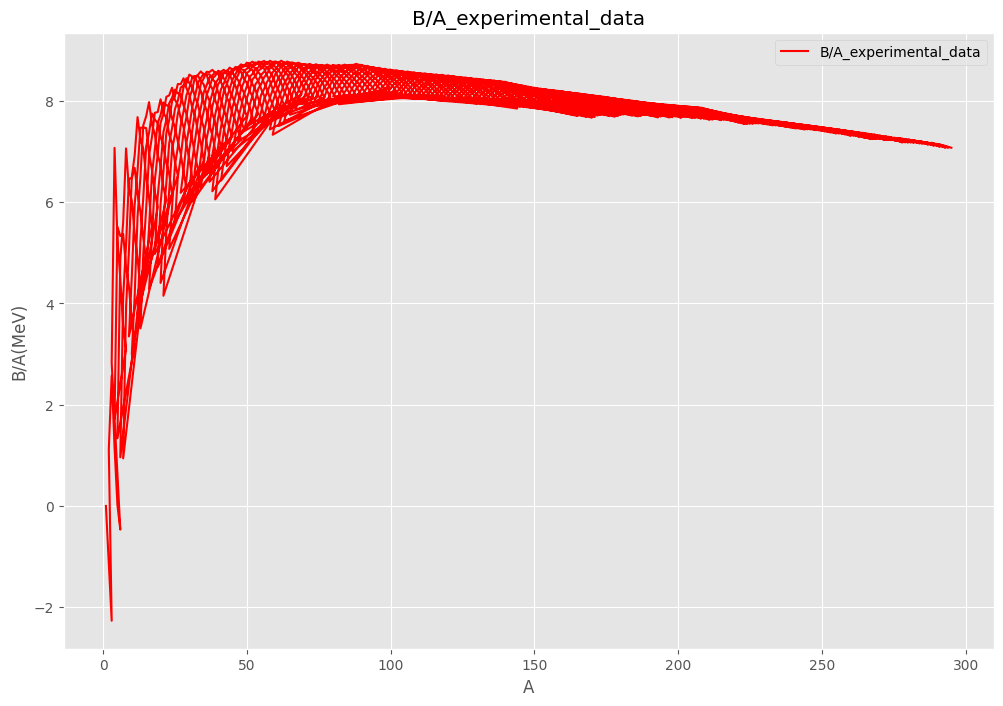

In [42]:
# plotting the experimental data of all existing nuclei's binding energy according to their mass number
plt.plot(df['A'],df['B/A(MeV)'],label="B/A_experimental_data",color='red')
plt.ylabel('B/A(MeV)')
plt.xlabel('A')
plt.title('B/A_experimental_data')
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'B/A_experimenta_data')

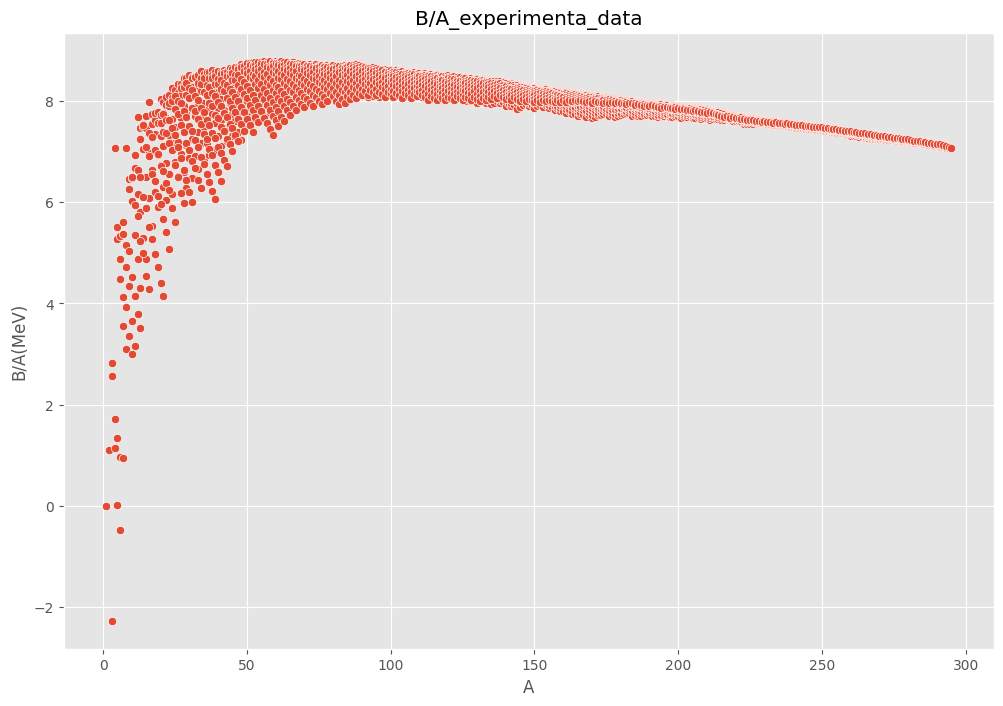

In [43]:
# a scatter plot is more expressing in this case

ax= sns.scatterplot(x='A',y='B/A(MeV)',data=df)
ax.set_title('B/A_experimenta_data')

# binding energy for stable nuclei
Because of the large number of existing nuclei, interpreting any plot comprehensively becomes challenging. Therefore, we will focus our analysis on stable nuclei elements only
# experimental data
we will take a first look to the experimental data for the binding energy of each nuclei![images.png](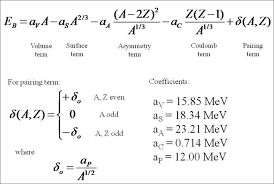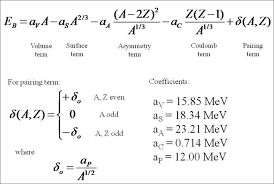)

In [44]:
# this dataset contains only the element's mass number and charge
df1=pd.read_csv('/content/stable_nuclei.csv')
df1.head()

,Element,Mass Number,Charge Number
0,Hydrogen,1,1
1,Deuterium,2,1
2,Helium,3,2
3,Helium,4,2
4,Lithium,6,3


In [45]:
# renaming columns and creating the neutron number's column
df1.rename(columns={'Mass Number':'A','Charge Number':'Z'},inplace=True)
df1['N']=df1['A']-df1['Z']
df1.head()

,Element,A,Z,N
0,Hydrogen,1,1,0
1,Deuterium,2,1,1
2,Helium,3,2,1
3,Helium,4,2,2
4,Lithium,6,3,3


Our dataset here doesn't contain the experimental results for the binding energy. Therefore, we will extract these values from the previously mentioned dataframe named 'df', matching the elements present in our new data frame.

In [46]:
L=[]
for index, row in df1.iterrows():
  a=row['N']
  b=row['Z']
  x= df.loc[df['z']==b, : ]

  x=x.loc[(x['n']==a), : ]
  for i in x['B/A(MeV)']:
    L.append(float(i))
L.append(7.86)
df1['B/A(MeV)']=L
df1

,Element,A,Z,N,B/A(MeV)
0,Hydrogen,1,1,0,0.000000
1,Deuterium,2,1,1,1.112283
2,Helium,3,2,1,2.572680
3,Helium,4,2,2,7.073916
4,Lithium,6,3,3,5.332331
...,...,...,...,...,...
240,Thallium,205,81,124,7.879933
241,Lead,204,82,122,7.875362
242,Lead,206,82,124,7.869866
243,Lead,207,82,125,7.867453


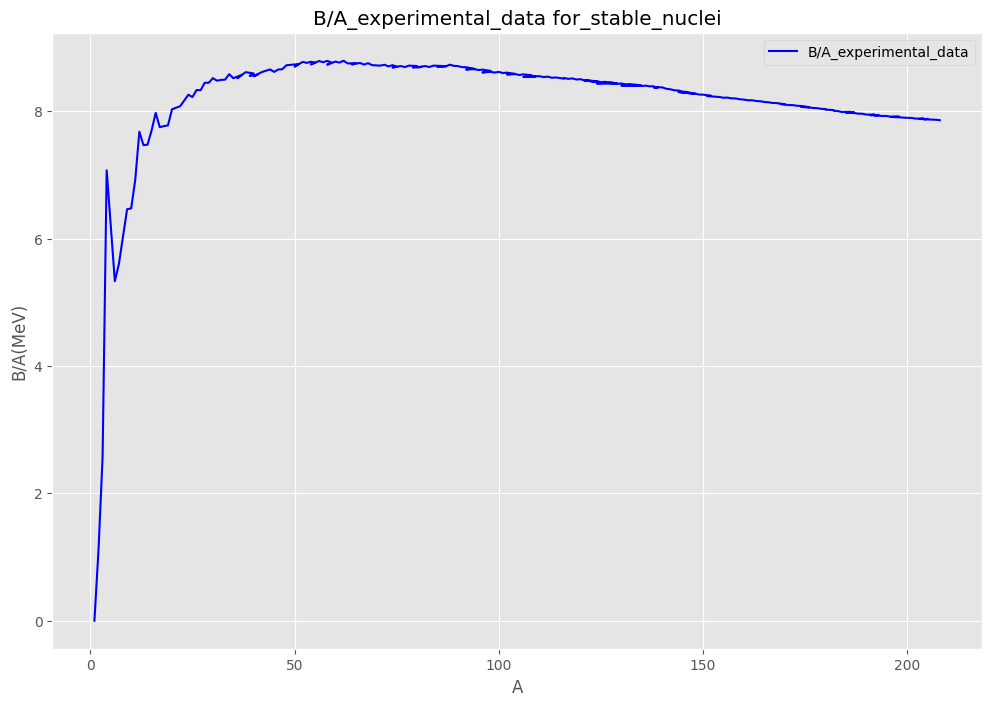

In [47]:
#plotting the experimental values for stable nuclei
plt.plot(df1['A'],df1['B/A(MeV)'],label="B/A_experimental_data",color='blue')
plt.ylabel('B/A(MeV)')
plt.xlabel('A')
plt.title('B/A_experimental_data for_stable_nuclei')
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'B/A_experimenta_data_for_stable_nuclei')

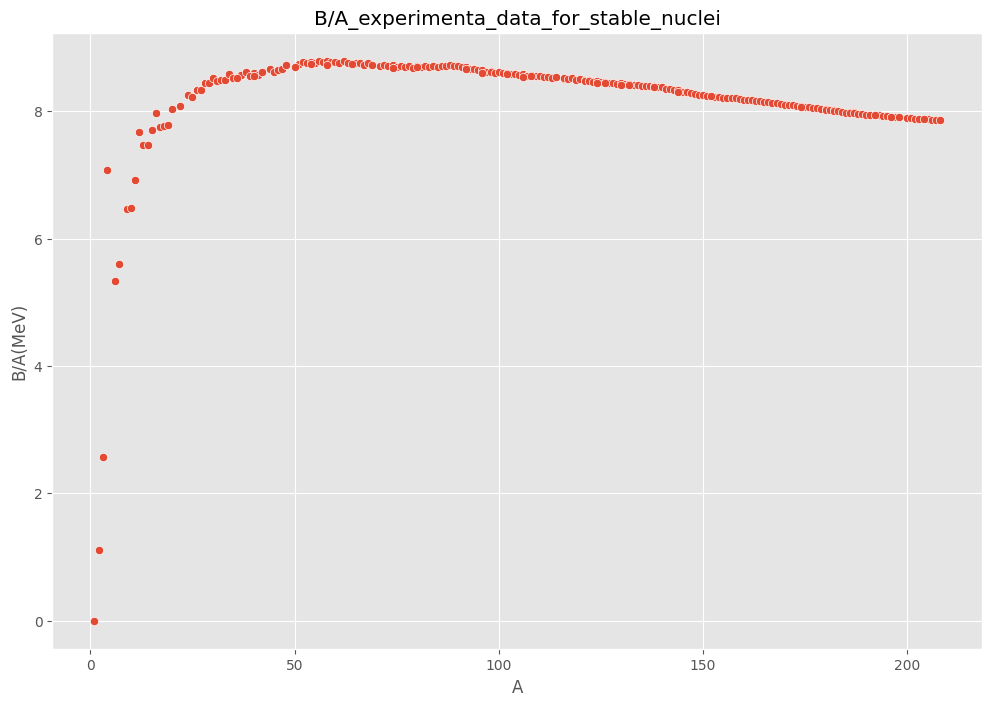

In [48]:
ax= sns.scatterplot(x='A',y='B/A(MeV)',data=df1)
ax.set_title('B/A_experimenta_data_for_stable_nuclei')

# Binding energy and semi-empirical mass formula
now we dive into the theoretical work where we will use the semi-empirical mass formula to obtain binding energy
we will explore each element of the given formula


In [49]:
#defining constants
av,asur,ac,asym,ap=15.8,18.3,0.71,23.2,11.2



**defining terms of the semi-empirical mass formula**

In [50]:
def volu(A):
  #volume term

  return(A*av)


def surface(A):
  #surface term

  l=A**(2/3)
  return(asur*l)


def coul(Z,A):
  # coulombien term

  l= (Z**2)/(A**(1/3))
  return(ac*l)


def sym(Z,A):
  #symetry term

  l= ((A-(2*Z))**2)/A
  return(asym*l)


def appa(A,Z):
  #appariement term

  x= ap*(A**(-1/2))
  y=0
  if A%2==0:
    if Z%2==0: y=1
    else: y=-1
  else: y=0

  return(y*x)




**calculating the different terms of the semi empirical mass formula for each stable nuclei**


In [51]:

df1['volume_term']=df1['A'].apply(volu)
df1['surface_term']=df1['A'].apply(surface)
df1['coulombien_term']=[coul(row['Z'],row['A']) for index,row in df1.iterrows()]
df1['symetry_term']=[sym(row['Z'],row['A']) for index,row in df1.iterrows()]
df1['appariement_term']= [appa(row['A'],row['Z']) for index,row in df1.iterrows()]
df1['binding_energy(MeV)']= df1['volume_term']-df1['surface_term']-df1['symetry_term']-df1['coulombien_term']+df1['appariement_term']
df1.head()



,Element,A,Z,N,B/A(MeV),volume_term,surface_term,coulombien_term,symetry_term,appariement_term,binding_energy(MeV)
0,Hydrogen,1,1,0,0.000000,15.8,18.300000,0.710000,23.200000,0.000000,-26.410000
1,Deuterium,2,1,1,1.112283,31.6,29.049439,0.563527,0.000000,-7.919596,-5.932563
2,Helium,3,2,1,2.572680,47.4,38.065534,1.969146,7.733333,0.000000,-0.368013
3,Helium,4,2,2,7.073916,63.2,46.113110,1.789088,0.000000,5.600000,20.897802
4,Lithium,6,3,3,5.332331,94.8,60.425269,3.516553,0.000000,-4.572381,26.285798


In [52]:
#calculating the binding enrgy per nucleons number A for each element   B/A
# The corresponding column will be labeled B//A to distinguish it from the experimental result labeled B/A
df1['B//A']=df1['binding_energy(MeV)']/df1['A']
df1


,Element,A,Z,N,B/A(MeV),volume_term,surface_term,coulombien_term,symetry_term,appariement_term,binding_energy(MeV),B//A
0,Hydrogen,1,1,0,0.000000,15.8,18.300000,0.710000,23.200000,0.000000,-26.410000,-26.410000
1,Deuterium,2,1,1,1.112283,31.6,29.049439,0.563527,0.000000,-7.919596,-5.932563,-2.966281
2,Helium,3,2,1,2.572680,47.4,38.065534,1.969146,7.733333,0.000000,-0.368013,-0.122671
3,Helium,4,2,2,7.073916,63.2,46.113110,1.789088,0.000000,5.600000,20.897802,5.224450
4,Lithium,6,3,3,5.332331,94.8,60.425269,3.516553,0.000000,-4.572381,26.285798,4.380966
...,...,...,...,...,...,...,...,...,...,...,...,...
240,Thallium,205,81,124,7.879933,3239.0,636.239064,790.030333,209.252683,0.000000,1603.477920,7.821844
241,Lead,204,82,122,7.875362,3223.2,634.168308,810.978482,181.960784,0.784157,1596.876583,7.827826
242,Lead,206,82,124,7.869866,3254.8,638.306455,808.345416,198.664078,0.780341,1610.264392,7.816817
243,Lead,207,82,125,7.867453,3270.6,640.370504,807.041631,207.230918,0.000000,1615.956947,7.806555


The formula appears to generate inconsistencies for Hydrogen, Deuterium, and Tantalum-180.we will directly  replace these values with other matching values from the  existing experimental data for these elements.

In [53]:
df1['B//A'][0]=0
df1['B//A'][1]=0
df1['B//A'][212]=8

<ipython-input-53-183402597ea0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['B//A'][0]=0
<ipython-input-53-183402597ea0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['B//A'][1]=0
<ipython-input-53-183402597ea0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['B//A'][212]=8


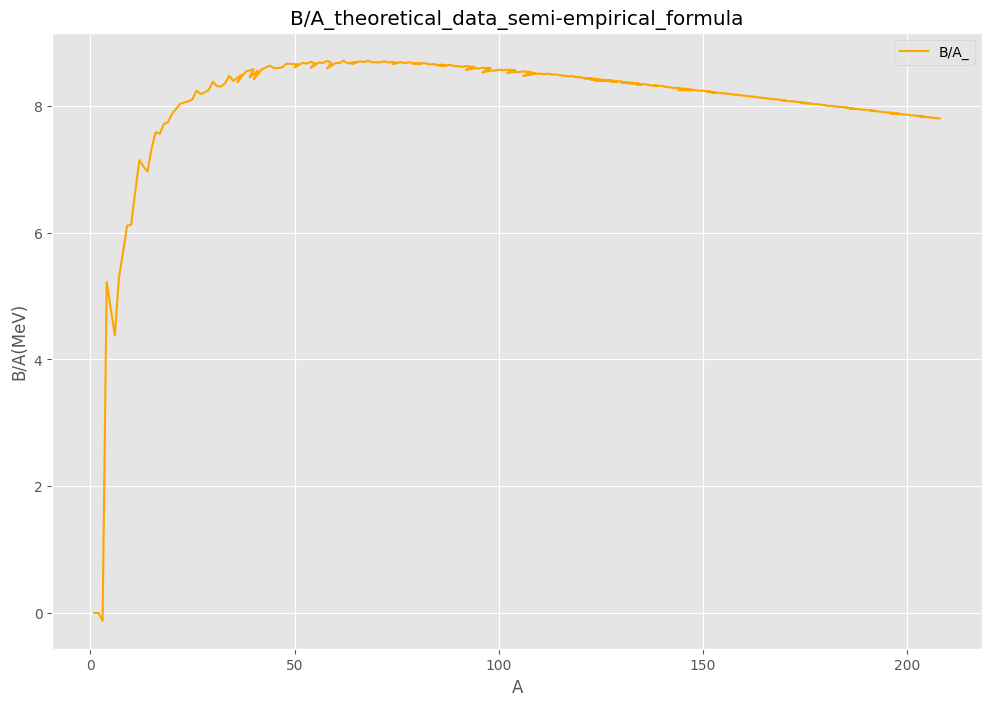

In [54]:
#plotting the obtained results of the semi-empirical mass formula
plt.plot(df1['A'],df1['B//A'],label="B/A_",color='orange')
plt.ylabel('B/A(MeV)')
plt.xlabel('A')
plt.title('B/A_theoretical_data_semi-empirical_formula')
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'semi-empirical_formula')

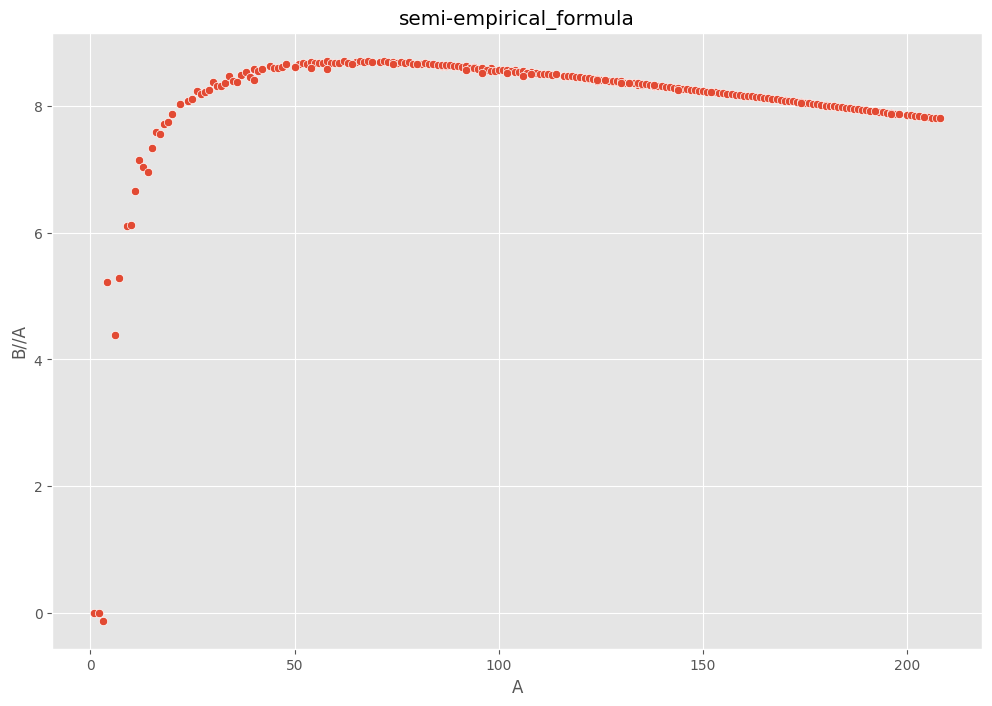

In [55]:
ax=sns.scatterplot(x='A',y='B//A',data=df1)
ax.set_title('semi-empirical_formula')


# different terms contribution
We will create a multi-panel figure that visualizes each term of the semi-empirical mass formula separately, allowing us to analyze the individual contribution of each term to the total binding energy across different mass numbers.

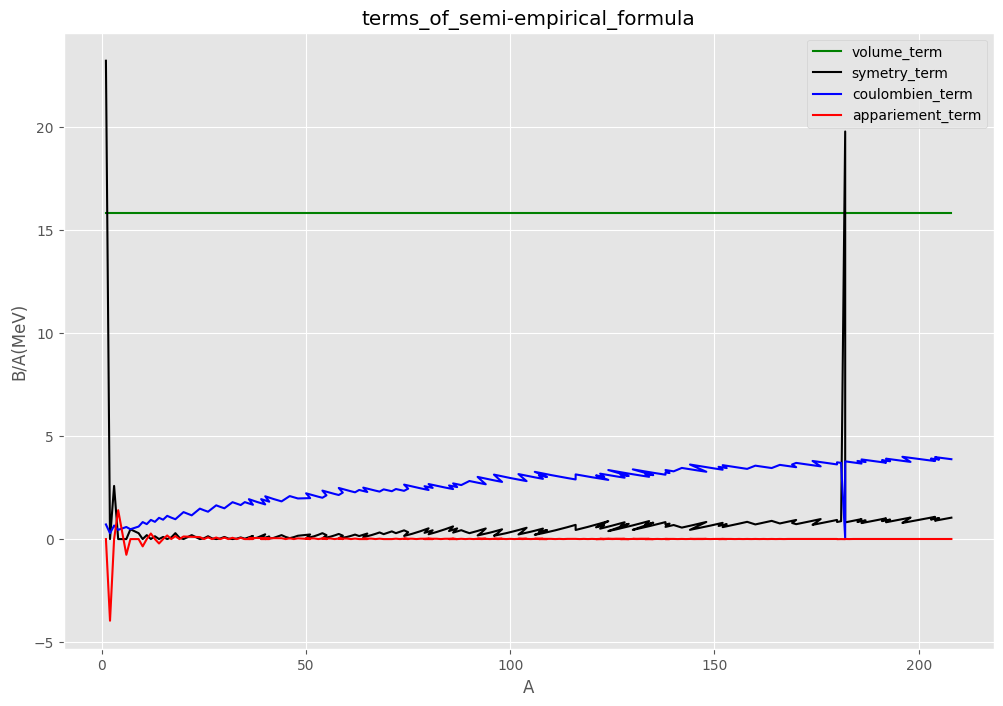

In [56]:

plt.plot(df1['A'],(df1['volume_term']/df1['A']),label="volume_term",color='green')
plt.plot(df1['A'],(df1['symetry_term']/df1['A']),label="symetry_term",color='black')
plt.plot(df1['A'],(df1['coulombien_term']/df1['A']),label="coulombien_term",color='blue')
plt.plot(df1['A'],(df1['appariement_term']/df1['A']),label="appariement_term",color='red')
plt.ylabel('B/A(MeV)')
plt.xlabel('A')
plt.title('terms_of_semi-empirical_formula')
plt.legend()
plt.grid(True)
plt.show()

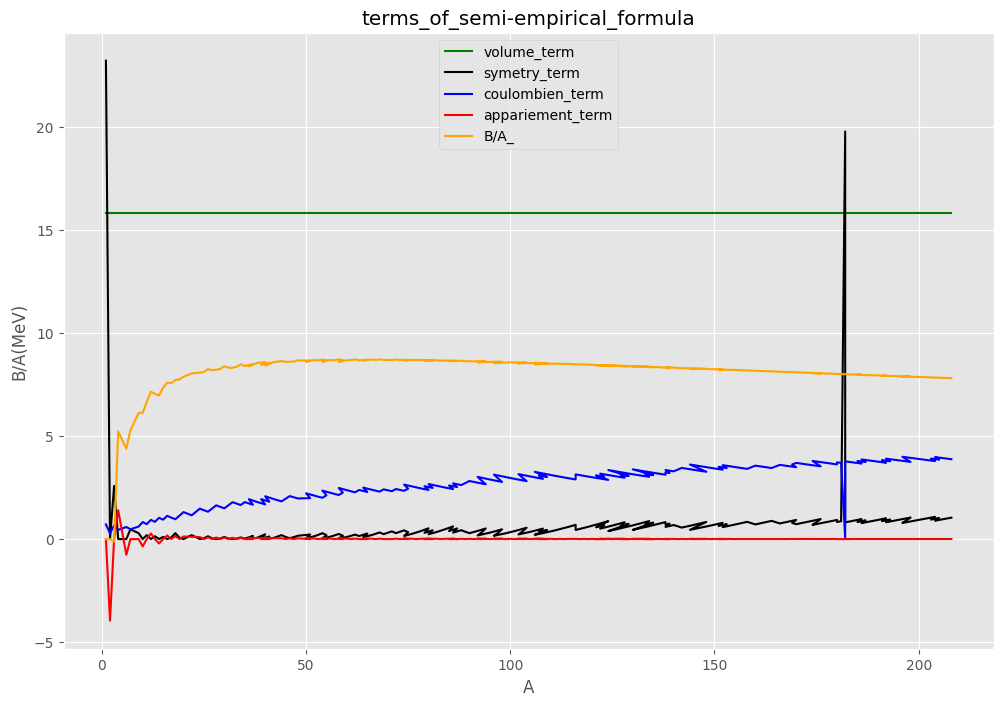

In [57]:
#adding the B/A plot
plt.plot(df1['A'],(df1['volume_term']/df1['A']),label="volume_term",color='green')
plt.plot(df1['A'],(df1['symetry_term']/df1['A']),label="symetry_term",color='black')
plt.plot(df1['A'],(df1['coulombien_term']/df1['A']),label="coulombien_term",color='blue')
plt.plot(df1['A'],(df1['appariement_term']/df1['A']),label="appariement_term",color='red')
plt.plot(df1['A'],df1['B//A'],label="B/A_",color='orange')
plt.ylabel('B/A(MeV)')
plt.xlabel('A')
plt.title('terms_of_semi-empirical_formula')
plt.legend()
plt.grid(True)
plt.show()

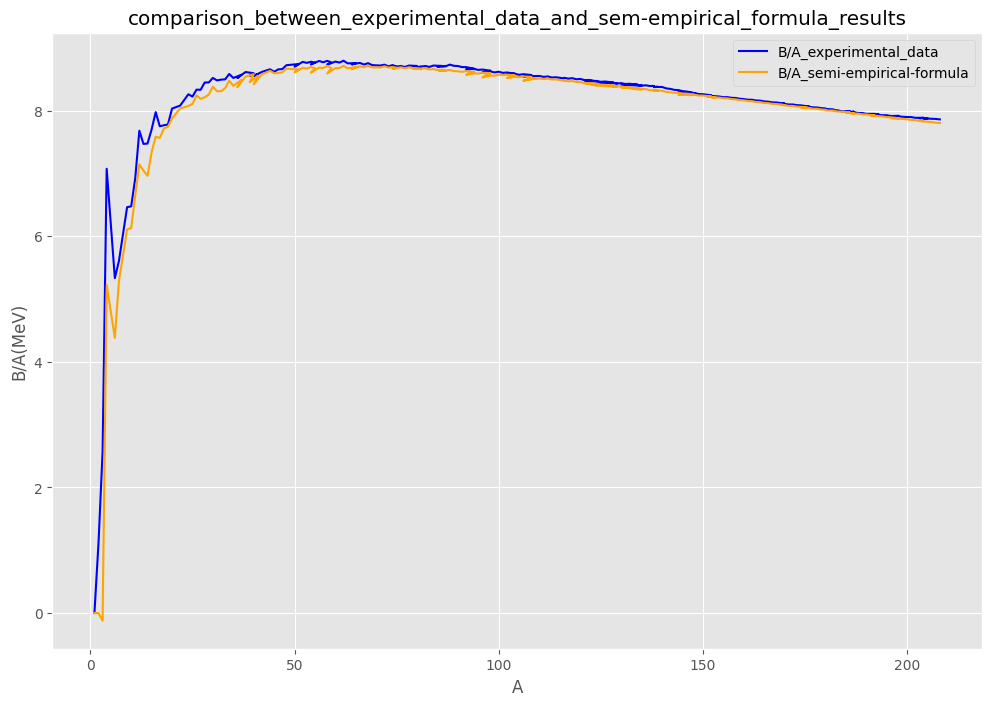

In [58]:
#comparison between experimental data and the results given by the semi-empirical mass formula
plt.plot(df1['A'],df1['B/A(MeV)'],label='B/A_experimental_data',color='blue')
plt.plot(df1['A'],df1['B//A'],label="B/A_semi-empirical-formula",color='orange')
plt.ylabel('B/A(MeV)')
plt.xlabel('A')
plt.title('comparison_between_experimental_data_and_sem-empirical_formula_results')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
#analysing the difference between the semi-empirica mass formula and the experimental data
df1['minus']=df1['B//A']-df1['B/A(MeV)']
df1.head()

,Element,A,Z,N,B/A(MeV),volume_term,surface_term,coulombien_term,symetry_term,appariement_term,binding_energy(MeV),B//A,minus
0,Hydrogen,1,1,0,0.000000,15.8,18.300000,0.710000,23.200000,0.000000,-26.410000,0.000000,0.000000
1,Deuterium,2,1,1,1.112283,31.6,29.049439,0.563527,0.000000,-7.919596,-5.932563,0.000000,-1.112283
2,Helium,3,2,1,2.572680,47.4,38.065534,1.969146,7.733333,0.000000,-0.368013,-0.122671,-2.695352
3,Helium,4,2,2,7.073916,63.2,46.113110,1.789088,0.000000,5.600000,20.897802,5.224450,-1.849465
4,Lithium,6,3,3,5.332331,94.8,60.425269,3.516553,0.000000,-4.572381,26.285798,4.380966,-0.951365


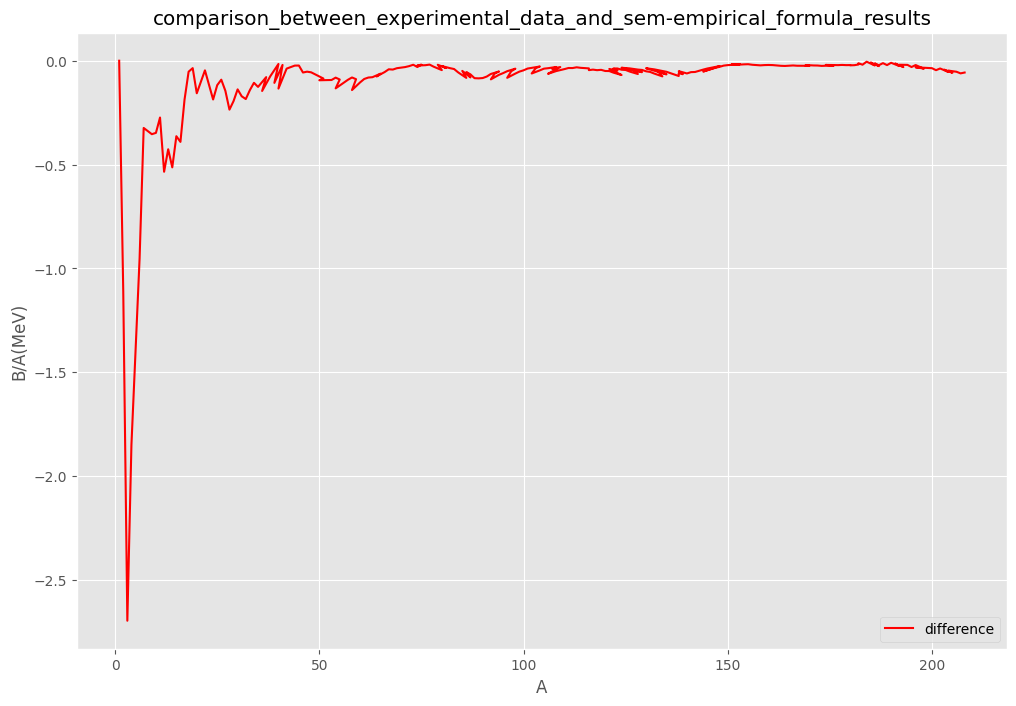

In [60]:
plt.plot(df1['A'],df1['minus'],label='difference',color='red')

plt.ylabel('B/A(MeV)')
plt.xlabel('A')
plt.title('comparison_between_experimental_data_and_sem-empirical_formula_results')
plt.legend()
plt.grid(True)
plt.show()